In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [251]:
df=pd.read_csv('advertising.csv')

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [255]:
df.drop_duplicates()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [257]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [259]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [261]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [263]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

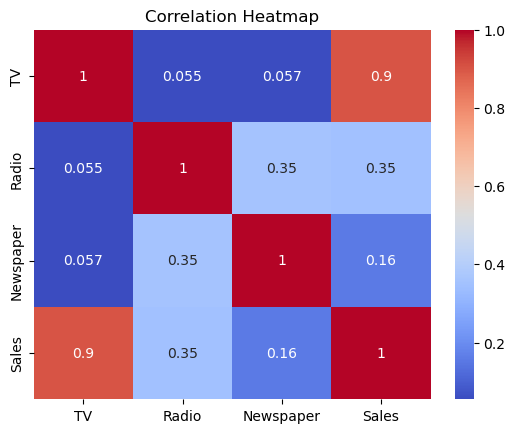

In [265]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

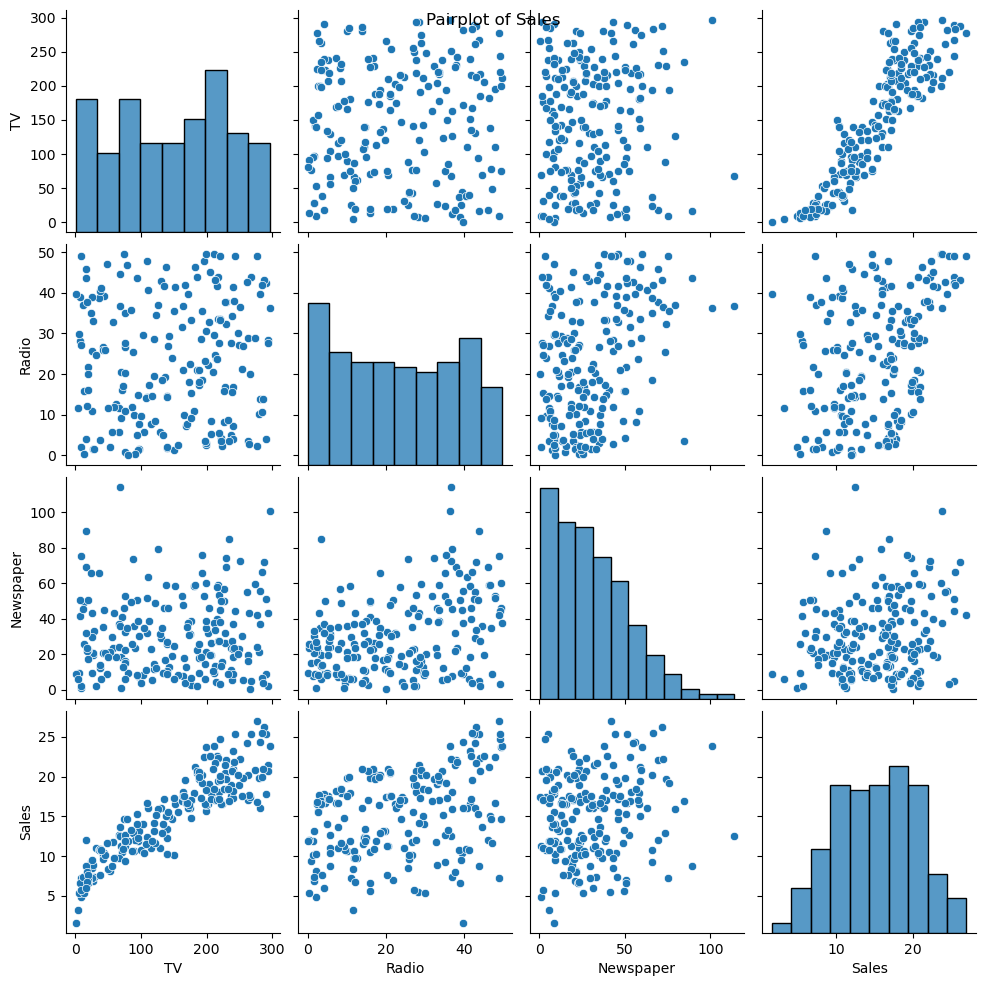

In [267]:
sns.pairplot(df[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.suptitle('Pairplot of Sales')
plt.show()

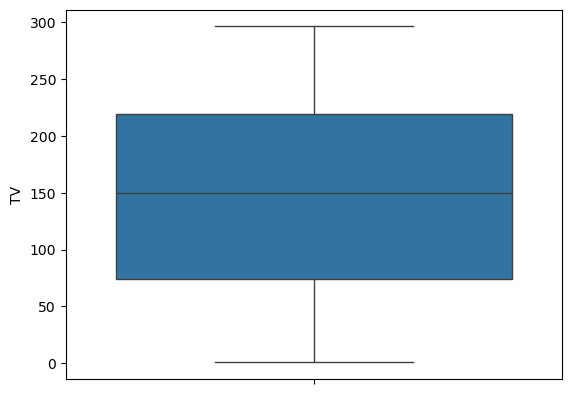

In [225]:
sns.boxplot(df['TV'])
plt.show()

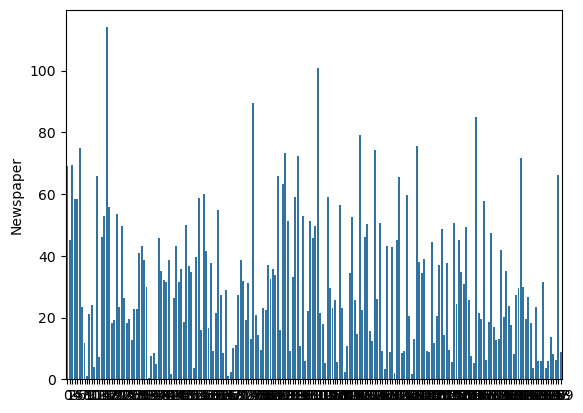

In [228]:
sns.barplot(df['Newspaper'])
plt.show()

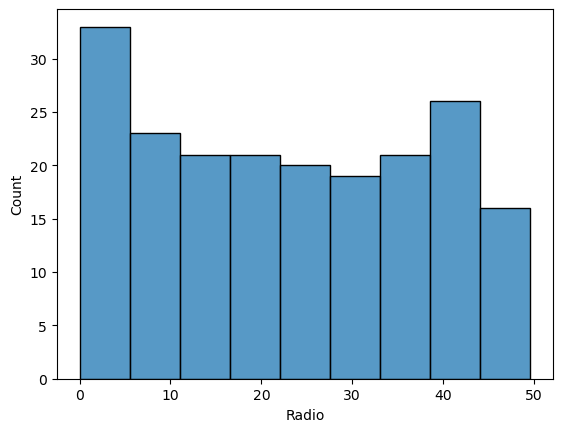

In [230]:
sns.histplot(df['Radio'])
plt.show()

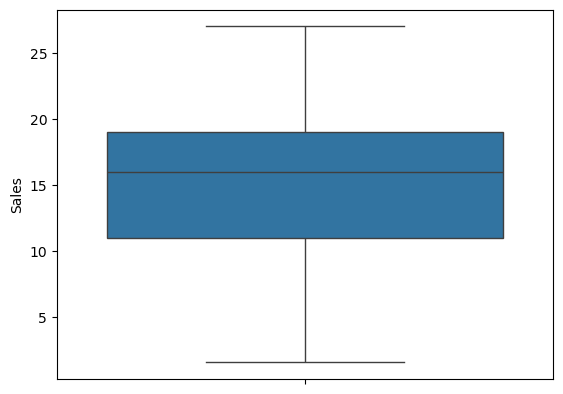

In [232]:
sns.boxplot(df['Sales'])
plt.show()

In [234]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print('mae:',mean_absolute_error(y_test, y_pred))

MSE: 3.7313396871514537
R2 Score: 0.8643489565472134
mae: 1.3844197442921458


In [236]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print('mae:',mean_absolute_error(y_test, y_pred))

MSE: 1.497299639999997
R2 Score: 0.9455663982491667
mae: 0.9426399999999981


In [238]:
results = pd.DataFrame({'Actual Sales': y_test.values, 'Predicted Sales': y_pred})
print(results.head(10))

   Actual Sales  Predicted Sales
0          15.6           16.719
1          18.2           17.720
2          15.9           14.889
3          16.6           18.437
4          14.0           13.601
5           8.1            8.651
6          16.1           16.791
7          19.6           18.903
8           8.8            8.656
9          11.9           12.547


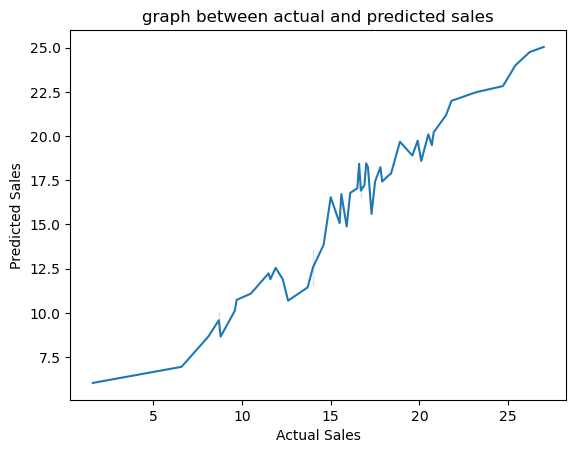

In [240]:
sns.lineplot(x=y_test, y=y_pred)
plt.title('graph between actual and predicted sales')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

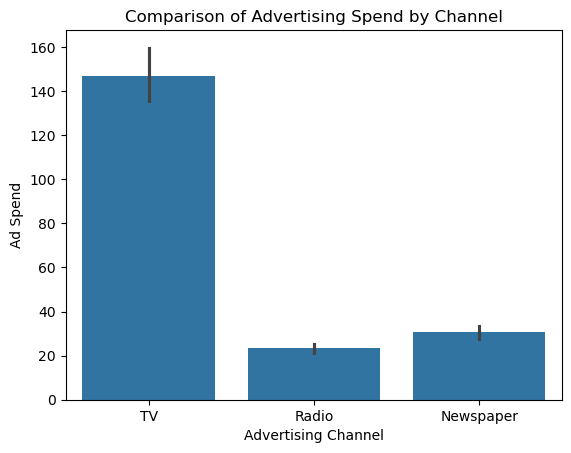

In [242]:
df_melted = df.melt(value_vars=['TV', 'Radio', 'Newspaper'],
                    var_name='Ad_Channel', value_name='Ad_Spend')
sns.barplot(x='Ad_Channel', y='Ad_Spend', data=df_melted)
plt.xlabel("Advertising Channel")
plt.ylabel("Ad Spend")
plt.title("Comparison of Advertising Spend by Channel")
plt.show()

In [247]:
new_data = pd.DataFrame({
    'TV': [100, 200, 300, 400, 500],
    'Radio': [50, 100, 150, 200, 250],
    'Newspaper': [10, 20, 30, 40, 50]
})

predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [15.154 23.388 24.812 24.963 25.061]
